In [1]:
import numpy as np
import pandas as pd
# The statistical module used to run chi square test
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
csv1 = "Data/Behavioral_Risk_2011_clean.csv"

csv2 = "Data/CDC_STATE_System_E-Cigarette_Legislation_-_Tax.csv"

usage_df = pd.read_csv(csv1)
legis_first_df = pd.read_csv(csv2)
#usage_df.head()
legis_df = legis_first_df.drop_duplicates(subset=['ProvisionID', 'Enacted_Date', 'Effective_Date', 'LocationAbbr'], keep='first')
legis_df

,YEAR,Quarter,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,DataSource,ProvisionGroupDesc,ProvisionDesc,ProvisionValue,...,Comments,Enacted_Date,Effective_Date,GeoLocation,DisplayOrder,TopicTypeId,TopicId,MeasureId,ProvisionGroupID,ProvisionID
0,2016,2,VI,U.S. Virgin Islands,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,Percent Value,45,...,NaN,3/23/2016,NaN,"(18.335765, -64.896335)",3,LEG,1040LEG,1001ETR,10GRP,452
1,2019,4,OH,Ohio,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,E-Cigarette Tax,Yes,...,NaN,7/18/2019,10/17/2019,"(40.06021014100048, -82.40426005599966)",1,LEG,1040LEG,1001ETR,10GRP,450
3,2019,4,OH,Ohio,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,E-Cigarette Tax ($ each),0.01,...,NaN,7/18/2019,10/17/2019,"(40.06021014100048, -82.40426005599966)",2,LEG,1040LEG,1001ETR,10GRP,451
4,2019,4,OH,Ohio,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,Type of Tax,Per vapor volume,...,NaN,7/18/2019,10/17/2019,"(40.06021014100048, -82.40426005599966)",4,LEG,1040LEG,1001ETR,10GRP,453
5,2017,3,VI,U.S. Virgin Islands,Legislation - E-Cigarette - Tax,Tax Stamp,OSH,Requirements,Encrypted Image/Hologram Required,No Provision,...,NaN,NaN,NaN,"(18.335765, -64.896335)",3,LEG,1040LEG,1023CET,12GRP,479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8421,2015,3,WV,West Virginia,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,E-Cigarette Tax ($ each),No Provision,...,NaN,NaN,NaN,"(38.66551020200046, -80.71264013499967)",2,LEG,1040LEG,1001ETR,10GRP,451
9077,2017,1,KS,Kansas,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,Type of Tax,Per milliliter of consumable material,...,E-Cigarettes are taxed at a rate of $0.20 per ...,6/16/2015,1/1/2017,"(38.34774030000045, -98.20078122699965)",4,LEG,1040LEG,1001ETR,10GRP,453
9299,2017,2,CA,California,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,Percent Value,27.3,...,NaN,10/31/2016,4/1/2017,"(37.63864012300047, -120.99999953799971)",3,LEG,1040LEG,1001ETR,10GRP,452
9585,2017,1,KS,Kansas,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,E-Cigarette Tax ($ each),0.2,...,E-Cigarettes are taxed at a rate of $0.20 per ...,6/16/2015,1/1/2017,"(38.34774030000045, -98.20078122699965)",2,LEG,1040LEG,1001ETR,10GRP,451


In [2]:
legis_drop_df = legis_df[legis_df.ProvisionValue !="No Provision"]
legis_count_df = legis_drop_df.groupby(['LocationAbbr']).agg({'ProvisionGroupDesc':'count'})
legis_count_df.sort_values(by=['ProvisionGroupDesc'], ascending=False).head()

,ProvisionGroupDesc
LocationAbbr,
DC,6
KS,6
CA,5
MN,4
VI,4


In [3]:
usage_clean_df = usage_df

usage_clean_df = usage_clean_df[usage_clean_df.MeasureDesc !="Frequency of Use"]
usage_clean_df = usage_clean_df[usage_clean_df.Gender !="Overall"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Not Current"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Former"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Never"]

usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Cigarette Use_Adults"]
usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Smokeless Tobacco Use (Adults)"]
usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Cessation (Adults)"]

usage_clean_df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation
0,2018,KY,Kentucky,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,2.1,25.3,33.5,1144.0,Female,All Races,18 to 44 Years,All Grades,"(37.645970271000465, -84.77497104799966)"
1,2018,CO,Colorado,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,0.6,11.1,13.7,4201.0,Female,All Races,All Ages,All Grades,"(38.843840757000464, -106.13361092099967)"
2,2018,DC,District of Columbia,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,1.0,10.6,14.6,2271.0,Female,All Races,All Ages,All Grades,"(38.89037138500049, -77.03196112699965)"
3,2018,WI,Wisconsin,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,1.8,13.0,20.0,614.0,Female,All Races,18 to 44 Years,All Grades,"(44.39319117400049, -89.81637074199966)"
4,2018,GA,Georgia,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,0.7,13.3,15.9,4918.0,Female,All Races,All Ages,All Grades,"(32.83968109300048, -83.62758034599966)"


In [4]:
combo_df = pd.merge(left=usage_clean_df, right=legis_count_df, left_on='LocationAbbr', right_on='LocationAbbr')

merged_clean_df = combo_df.filter(['LocationAbbr', 'Data_Value', 'ProvisionGroupDesc'])
merged_final_df = merged_clean_df.groupby(['LocationAbbr'], as_index=False).mean()
#merged_final_df.sort_values(by='ProvisionGroupDesc', ascending=False)
top_legis = ['CA', 'DC', 'KS']
sample_df = merged_final_df.loc[merged_final_df['LocationAbbr'].isin(top_legis)]
population_df = merged_final_df
sample_list = sample_df['Data_Value']
population_list = population_df['Data_Value']
sample_df

,LocationAbbr,Data_Value,ProvisionGroupDesc
0,CA,9.780,5
2,DC,13.490,6
5,KS,16.046,6


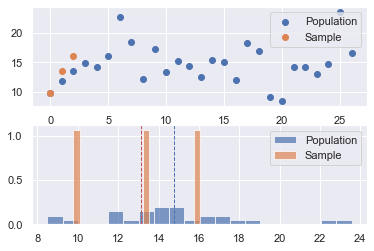

In [5]:

plt.subplot(2, 1, 1)
plt.scatter(range(len(population_list)), population_list, label="Population")
plt.scatter(range(len(sample_list)), sample_list, label="Sample")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(population_list, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample_list, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population_list.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(sample_list.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

In [6]:
stats.ttest_1samp(sample_list, population_list.mean())

Ttest_1sampResult(statistic=-0.9043793082335877, pvalue=0.4612495079228468)

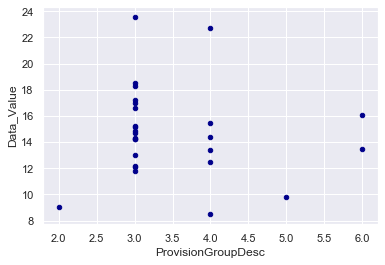

In [7]:
scatter = merged_final_df.plot.scatter(x='ProvisionGroupDesc',
                                      y='Data_Value',
                                      c='DarkBlue')

In [8]:
combo2_df = pd.merge(left=usage_clean_df, right=legis_drop_df, left_on='LocationAbbr', right_on='LocationAbbr')
merged_type_df = combo2_df.groupby(['LocationAbbr', 'ProvisionDesc', 'ProvisionValue'], as_index=False).mean()
merged_typefilter_df = merged_type_df.filter(['LocationAbbr', 'Data_Value', 'ProvisionDesc', 'ProvisionValue'])
merged_typefilter_df
tax_value_df = merged_typefilter_df.loc[merged_typefilter_df['ProvisionDesc'] == "Percent Value"]
tax_value_df['ProvisionValue'] = tax_value_df['ProvisionValue'].astype(float)
tax_valuegroup_df = tax_value_df.groupby(['LocationAbbr'], as_index=False).mean()
tax_valuegroup_df.sort_values(by=['ProvisionValue'], ascending=False)

,LocationAbbr,Data_Value,ProvisionValue
14,VT,14.300000,92.00
4,MA,12.170909,75.00
1,DC,13.490000,72.00
6,MN,13.434545,65.00
13,UT,8.485455,56.00
0,CA,9.780000,50.55
5,ME,17.200000,43.00
12,PA,16.966000,40.00
10,NV,15.122000,30.00
11,NY,12.103636,20.00


In [9]:
top_tax = ['VT', 'MA', 'DC', 'MN']
sample_tax_df = tax_valuegroup_df.loc[tax_valuegroup_df['LocationAbbr'].isin(top_tax)]
population_df = merged_final_df
sample_tax_list = sample_tax_df['Data_Value']
population_list = population_df['Data_Value']
sample_tax_df

,LocationAbbr,Data_Value,ProvisionValue
1,DC,13.490000,72.0
4,MA,12.170909,75.0
6,MN,13.434545,65.0
14,VT,14.300000,92.0


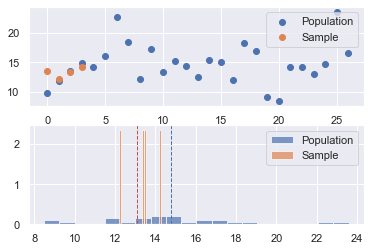

In [10]:
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_list)), population_list, label="Population")
plt.scatter(range(len(sample_tax_list)), sample_tax_list, label="Sample")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(population_list, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample_tax_list, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population_list.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(sample_list.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

In [11]:
stats.ttest_1samp(sample_tax_list, population_list.mean())

Ttest_1sampResult(statistic=-3.1879211975634196, pvalue=0.049790385721533485)

In [12]:

# Create the dataframe with top 6 states and their laws and percentage of current e-cig users
top_states = pd.DataFrame({'States':['CA', 'DC', 'KS'], 
                    'Legislation':['5','6','6'], 
                           '% of E-Cig Users':['9.78','13.49','16.04']
                        
                          }) 
  
# Print the dataframe 
top_states

,States,Legislation,% of E-Cig Users
0,CA,5,9.78
1,DC,6,13.49
2,KS,6,16.04


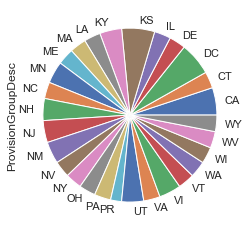

In [13]:
#pie plot to show all states 
legis_count_df["ProvisionGroupDesc"].plot.pie()


In [14]:
merged_typefilter_df
tax_whole_df = merged_typefilter_df.loc[merged_typefilter_df['ProvisionDesc'] == "E-Cigarette Tax ($ each)"]

#tax_valuegroup_df = tax_value_df.groupby(['LocationAbbr'], as_index=False).mean()
tax_whole_df.sort_values(by=['ProvisionValue'], ascending=False)


,LocationAbbr,Data_Value,ProvisionDesc,ProvisionValue
69,PR,9.080000,E-Cigarette Tax ($ each),3
71,UT,8.485455,E-Cigarette Tax ($ each),1.83
25,KY,22.698000,E-Cigarette Tax ($ each),1.5
53,NM,15.454000,E-Cigarette Tax ($ each),0.5
6,CT,11.790909,E-Cigarette Tax ($ each),0.4
45,NH,14.381818,E-Cigarette Tax ($ each),0.3
81,WA,13.036000,E-Cigarette Tax ($ each),0.27
22,KS,16.046000,E-Cigarette Tax ($ each),0.2
49,NJ,12.482000,E-Cigarette Tax ($ each),0.1
87,WV,23.570000,E-Cigarette Tax ($ each),0.075


In [19]:
top_eachtax = ['PR', 'UT', 'KY']
sample_eachtax_df = tax_whole_df.loc[tax_whole_df['LocationAbbr'].isin(top_eachtax)]
populationeach_df = merged_final_df
sample_each_list = sample_eachtax_df['Data_Value']
population_each__list = populationeach_df['Data_Value']
sample_eachtax_df

,LocationAbbr,Data_Value,ProvisionDesc,ProvisionValue
25,KY,22.698000,E-Cigarette Tax ($ each),1.5
69,PR,9.080000,E-Cigarette Tax ($ each),3
71,UT,8.485455,E-Cigarette Tax ($ each),1.83


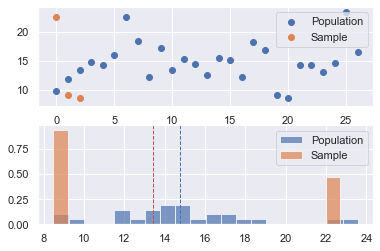

In [20]:
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_each__list)), population_each__list, label="Population")
plt.scatter(range(len(sample_each_list)), sample_each_list, label="Sample")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(population_each__list, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample_each_list, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population_each__list.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(sample_each_list.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

In [21]:
stats.ttest_1samp(sample_each_list, population_each__list.mean())

Ttest_1sampResult(statistic=-0.2863839830490425, pvalue=0.8015245862355992)

In [33]:
#usage_clean_df.head()


race_clean = usage_clean_df.filter(['Race', 'Data_Value', 'ProvisionDesc', 'ProvisionValue'])
race_df = race_clean.groupby(['Race'], as_index=False).mean()
race_df

,Race,Data_Value
0,All Races,15.27794
